In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARMAResults 
from statsmodels.tsa.arima_process import ArmaProcess 
from pandas import DataFrame , to_datetime
from datetime import timedelta, datetime
import statsmodels.graphics.tsaplots as tsaplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error
import scipy.stats as stats
from scipy import signal

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# TP N°12 : Séries Temporelles

## Q1

Importez les données du fichier **Openhealth_S-Grippal.csv**. Consultez http://www.openhealth.fr/suivi-epidemiologique-temps-reel/ias-incidence-des-syndromes-grippaux pour plus d’information sur les données. 
- Affichez les 5 premières lignes du jeu de données. 
- On va travailler seulement avec la variable **IAS_brut**, sous la forme d’une série temporelle, dont on précisera la fréquence d’échantillonage et les dates de début et de fin. 
- Pour cette variable, dans ce jeu de données, les cas de nullité correspondent à des données manquantes. Combien de données manquantes comporte-t-elle ? 
- Pour les traitements des questions suivantes, éliminez les données manquantes par imputation, c’est-à-dire en déduisant une valeur plus “raisonnable” aux dates non-observées à partir des valeurs aux dates observées : par exemple par la moyenne de deux dates les plus proches.

In [2]:
ST = pd.read_csv("OpenhealthS-Grippal.csv", sep = ';',na_values = 0, infer_datetime_format = True, decimal=',')

# Affichez les 5 premières lignes du jeu de données
ST.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


**fréquence d'échantillonnage et dates de début et de fin**

- la fréquence d'échantillonnage est de **1 échantillon par jour** 
- **date de début** : 2009-07-01
- **date de fin** : 2014-04-17


In [3]:
# Données manquantes
count_null = ST["IAS_brut"].isnull().sum()

print("Nous avons " + str(count_null) + " valeurs manquantes pour la variable 'IAS_brut' dans ce jeu de données")

Nous avons 8 valeurs manquantes pour la variable 'IAS_brut' dans ce jeu de données


In [4]:
# éliminez les données manquantes par imputation 

ST["IAS_brut"] = ST["IAS_brut"].interpolate(method="linear")

In [5]:
count_null_postImputation = ST["IAS_brut"].isnull().sum()

print("Nous avons " + str(count_null_postImputation) + " valeur manquante pour la variable 'IAS_brut' dans ce jeu de données après traitement par imputation")

Nous avons 0 valeur manquante pour la variable 'IAS_brut' dans ce jeu de données après traitement par imputation


## Q2  
Tracez la série temporelle considérée en fonction du temps. Commentez brièvement ce que vous observez.

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

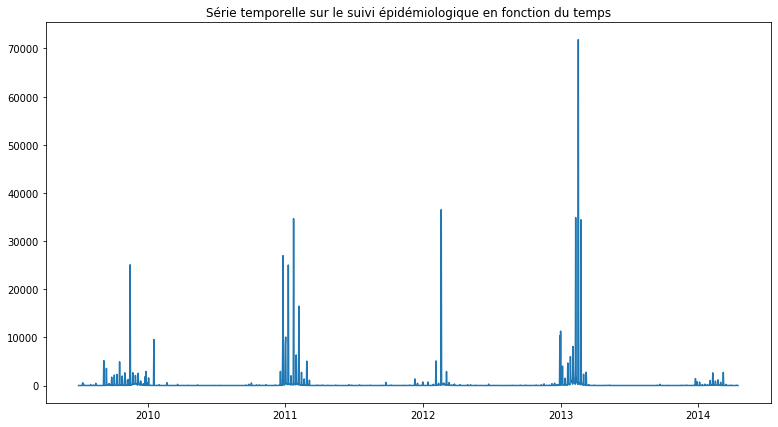

In [6]:
# changer le type de la colonne PERIODE
ST["PERIODE"] = pd.to_datetime(ST["PERIODE"])

plt.figure(figsize = (13,7))
xvals = ST["PERIODE"].to_numpy()
yvals =  ST["IAS_brut"]
plt.plot(xvals, yvals)
plt.title ("Série temporelle sur le suivi épidémiologique en fonction du temps")
plt.show

**Commentaires** : Au premier regard, la courbe ne ressemble pas à une série temporelle habituelle. Cependant, en regardant l'axe des ordonnées, on se rend compte que certaines valeurs sont très hautes, ce qui écrase le reste des valeurs. 

## Q3
Tracez l’histogramme de la loi marginale. Quel impact la distribution observée par l’histogramme a sur la trajectoire représentée à la question précédente ?

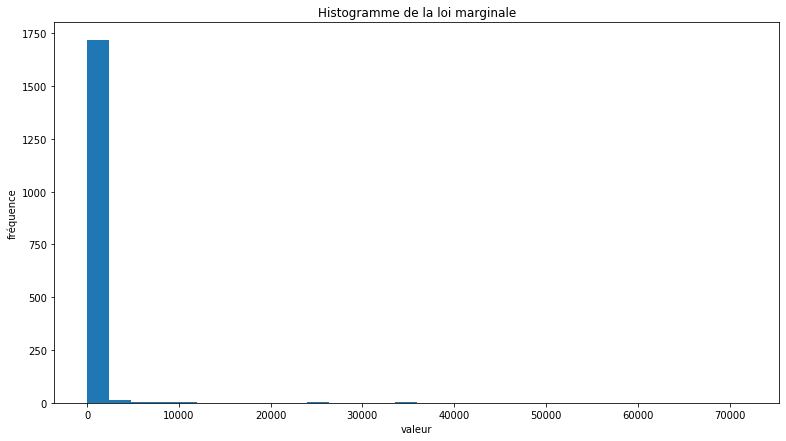

In [7]:
plt.figure(figsize=(13,7))
plt.hist(ST['IAS_brut'], bins=30)
plt.title("Histogramme de la loi marginale")
plt.ylabel("fréquence")
plt.xlabel("valeur")
plt.show()

**Quel impact la distribution observée par l’histogramme a sur la trajectoire représentée à la question précédente ?**

Notre hypothèse de la question précédente est confirmée

- Dans l'histogramme, on se rend compte que ce sont les petites valeurs qui sont en nombre important,
- Les grandes valeurs écrasent les petites valeurs sur le graphe
- C'est pourquoi on va utiliser le log pour rapprocher les grandes valeurs des petites et disperser l'histogramme


## Q4
Reprenez les questions précédentes après transformations des observations par le logarithme naturel. Commentez.

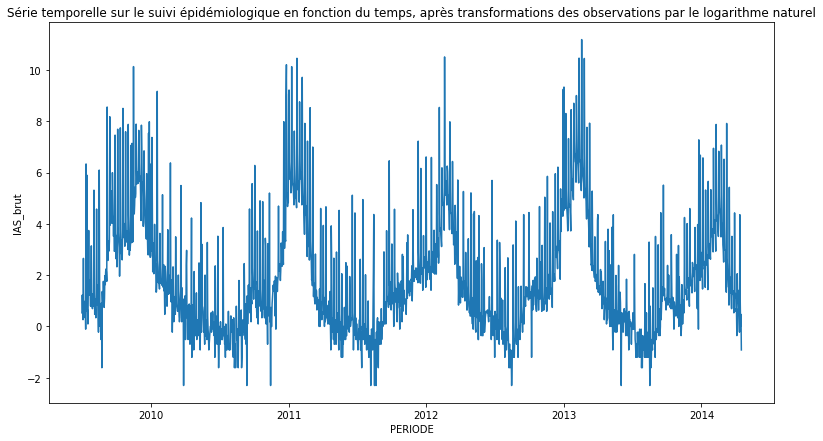

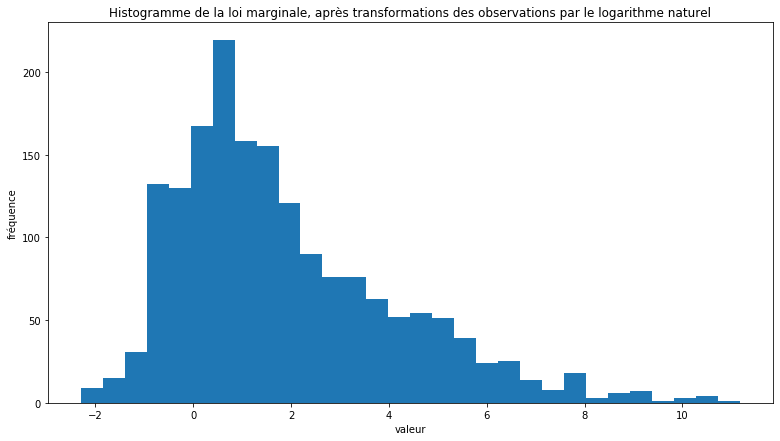

In [8]:
ST_log = ST.copy()  #to copy the Dataframe

ST_log['IAS_brut'] = np.log(ST_log['IAS_brut'])

#série temporelle considérée en fonction du temps

plt.figure(figsize = (13,7))
xvals = ST_log["PERIODE"].to_numpy()
yvals =  ST_log["IAS_brut"]
plt.plot(xvals, yvals)
plt.title ("Série temporelle sur le suivi épidémiologique en fonction du temps, après transformations des observations par le logarithme naturel")
plt.ylabel("IAS_brut")
plt.xlabel("PERIODE")
plt.show


#histogramme de la loi marginale

plt.figure(figsize=(13,7))
plt.hist(ST_log['IAS_brut'], bins=30)
plt.title("Histogramme de la loi marginale, après transformations des observations par le logarithme naturel")
plt.ylabel("fréquence")
plt.xlabel("valeur")
plt.show()

**Commentaire** : On voit bien que passer en log permet d'éviter l'écrasement par les grandes valeurs, les données sont plus exploitables puisqu' on voit une périodicité apparaître 

## Q5
En utilisant **signal.perodogram()** (du package signal importé depuis scipy), 

- tracez le périodogramme des données. 
- Expliquez les pics les plus significatifs que vous observez. Attention au fait que dans la communauté signal les spectres sont normalisées pour des fréquences absolues dans [−1/2, 1/2] plutôt que [−π, −π].

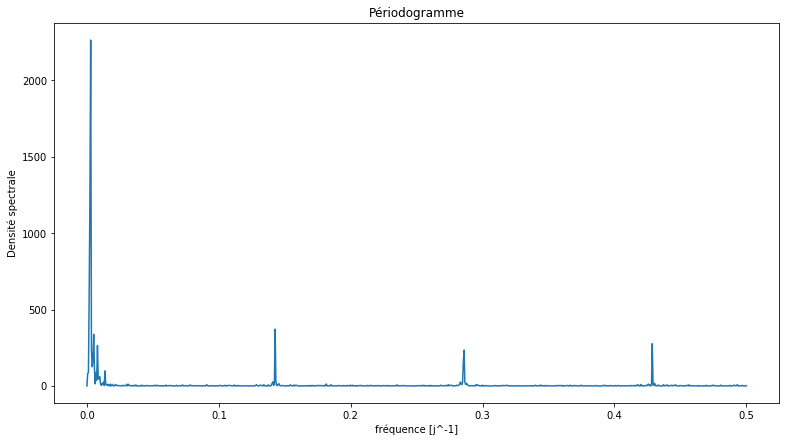

In [9]:
f, Pxx_den = signal.periodogram(ST_log['IAS_brut'])
plt.figure(figsize = (13,7))
plt.plot(f, Pxx_den)    
plt.ylabel("Densité spectrale")
plt.xlabel("fréquence [j^-1]")
plt.title("Périodogramme")
plt.show()

**Commentaires** 


$f = \frac{1}{T}$, donc plus la fréquence diminue et plus la  période est petite 

la période la plus significative d'après le périodogramme est la période de 1 an (celle représentant le plus grand pic, fréquence proche de 0): la grippe revient tous les ans. 

il y a d'autres pics remarquables près de 0, cela pourrait correspondre à une périodicité semestrielle voire trimestrielle.

il y a également:

- une fréquence de 0.15 (Période T est donc de 7 jours environ)  correspondant à une périodicité de 1 semaine
- une fréquence de 0.28 (Période T est donc de 3 à 4 jours environ)  correspondant à une périodicité d' 1/2 semaine
- une fréquence de 0.43 (Période T est donc de 2 jours environ) correspondant à une périodicité de deux jours.




                                                                                                                

## Q6
Pour supprimer une tendance périodique de période T dans un signal $(x_t)_{t \in Z}$ il suffit d’appliquer
le filtre $∆_T$ défini par
$$ [∆_T x] t = x_t − x_{t−T} $$
Utilisez cette méthode pour supprimer la tendance périodique de période 1 an. Quel pic du périodogramme cette méthode a fait disparaître ?

In [10]:
periodogramme = []
T=365 # periode

for i in range(365, len(ST)):
    delta_T = ST_log['IAS_brut'][i] - ST_log['IAS_brut'][i-T] 
    periodogramme.append(delta_T)

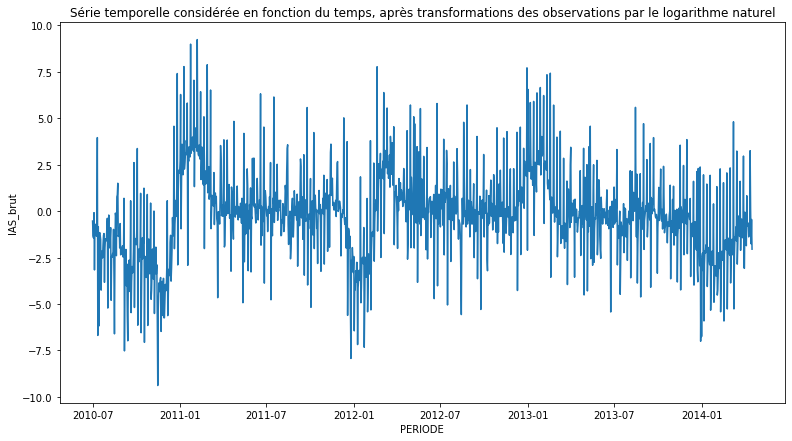

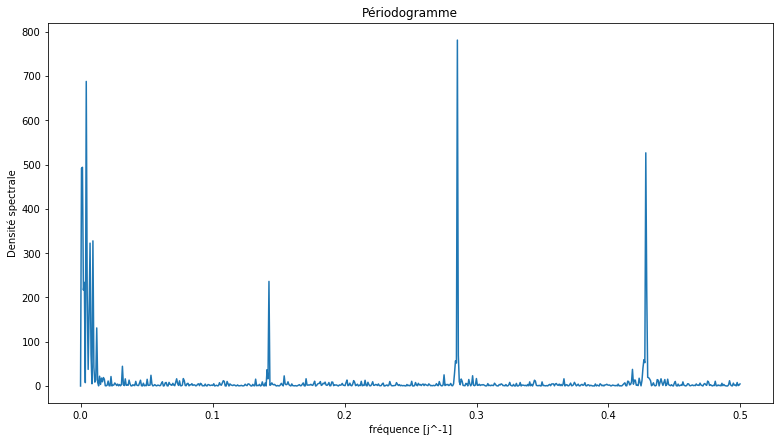

In [11]:
plt.figure(figsize = (13,7))
xvals = ST_log["PERIODE"][365:].to_numpy()
yvals =  periodogramme
plt.plot(xvals, yvals)
plt.title ("Série temporelle considérée en fonction du temps, après transformations des observations par le logarithme naturel")
plt.ylabel("IAS_brut")
plt.xlabel("PERIODE")
plt.show

f, Pxx_den = signal.periodogram(periodogramme)
plt.figure(figsize = (13,7))
plt.plot(f, Pxx_den)
plt.ylabel("Densité spectrale")
plt.xlabel("fréquence [j^-1]")
plt.title("Périodogramme")
plt.show()

**commentaire** : cette méthode fait disparaître le pic lié à la périodicité annuelle


## Q7
On vous propose un exercise de prédiction uniquement à partir de la tendance périodique. On va prédire : \ - les valeurs de IAS_brut pour les dates du 1er avril 2013 au 17 avril 2014 en se basant sur \ - les observations précédentes (du 1er juillet 2009 au 31 mars 2013) pour estimer la tendance périodique des données. 

Pour cela, pour un nombre d’harmoniques fixé (disons n_harm), construisez les variables explicatives pour la période d’apprentissage : 
- pour chaque k = 1, 2, ... n_harm, ajoutez deux variables explicatives, $x_{i,2k−1} = cos(t_i · k · \frac{2\pi}{T} )$ et $x_{i,2k} = sin(t_i · k · \frac{2\pi}{T} )$, où $t_i$ est le moment de temps (on peut utiliser les nombres entiers au lieu de dates) et $T = 365$. 
- Estimez la tendance périodique en régressant les données d’apprentissage sur ces variables explicatives.

Avec ce modèle linéaire, 
- prédisez les valeurs du variable IAS_brut pour la période du 1er avril 2013 au 17 avril 2014.
- Tracez les valeurs de la série temporelle et votre prédiction pour l’ensemble de données (vous pouvez utilisez les couleurs différentes pour les parties apprentissage et prédiction)
- Puis, donnez le risque quadratique de la prédiction et tracez les résidus pour la période prédite.
- Essayez les valeur de n_harm pour voir comment varie le risque quadratique de la prédiction.

In [12]:
#pour utiliser les nombres entiers au lieu de dates
ST_log["date_integer"] = list(range(1,len(ST)+1)) 

In [13]:
# construisez les variables explicatives pour la période d’apprentissage : pour chaque k = 1, 2, ... n_harm, ajoutez deux variables explicatives

n_harm = 5

for k in range(1, n_harm) :
    ST_log['add_cos' + str(k)] = np.cos(ST_log['date_integer'] * k * 2 * math.pi / 365)
    ST_log['add_sin' + str(k)] = np.sin(ST_log['date_integer'] * k * 2 * math.pi / 365)

# on retire les variables non explicatives

ST_log = ST_log.set_index('PERIODE').drop(['IAS_lisse', 'Incidence_Sentinelles','date_integer'], axis=1)

In [14]:
ST_log

,IAS_brut,add_cos1,add_sin1,add_cos2,add_sin2,add_cos3,add_sin3,add_cos4,add_sin4
PERIODE,,,,,,,,,
2009-07-01,0.530628,0.999852,0.017213,0.999407,0.034422,0.998667,0.051620,0.997630,0.068802
2009-07-02,1.223775,0.999407,0.034422,0.997630,0.068802,0.994671,0.103102,0.990532,0.137279
2009-07-03,0.741937,0.998667,0.051620,0.994671,0.103102,0.988023,0.154309,0.978740,0.205104
2009-07-04,0.262364,0.997630,0.068802,0.990532,0.137279,0.978740,0.205104,0.962309,0.271958
2009-07-05,2.653242,0.996298,0.085965,0.985220,0.171293,0.966848,0.255353,0.941317,0.337523
...,...,...,...,...,...,...,...,...,...
2014-04-13,4.355426,0.242850,-0.970064,-0.882048,-0.471160,-0.671260,0.741222,0.556017,0.831171
2014-04-14,0.993252,0.259512,-0.965740,-0.865307,-0.501242,-0.708627,0.705584,0.497513,0.867456
2014-04-15,0.000000,0.276097,-0.961130,-0.847541,-0.530730,-0.744104,0.668064,0.436651,0.899631


In [15]:
# Estimez la tendance périodique en régressant les données d’apprentissage sur ces variables explicatives.

ST_log_train = ST_log.loc["2009-07-01":"2013-03-31"]
ST_log_test = ST_log.loc["2013-03-31":]

# Creation du jeu d'entraînement et de test
y_train = ST_log_train['IAS_brut']
X_train = ST_log_train.drop(['IAS_brut'], axis=1)

y_test = ST_log_test['IAS_brut']
X_test = ST_log_test.drop(['IAS_brut'], axis=1)

reg = LinearRegression().fit(X=X_train, y=y_train)
ST_log_test['Prediction'] = reg.predict(X_test)

# Prédisez les valeurs du variable IAS_brut pour la période du 1er avril 2013 au 17 avril 2014.
y_pred = ST_log_test['Prediction']


/home/yamhiroto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<function matplotlib.pyplot.show(*args, **kw)>

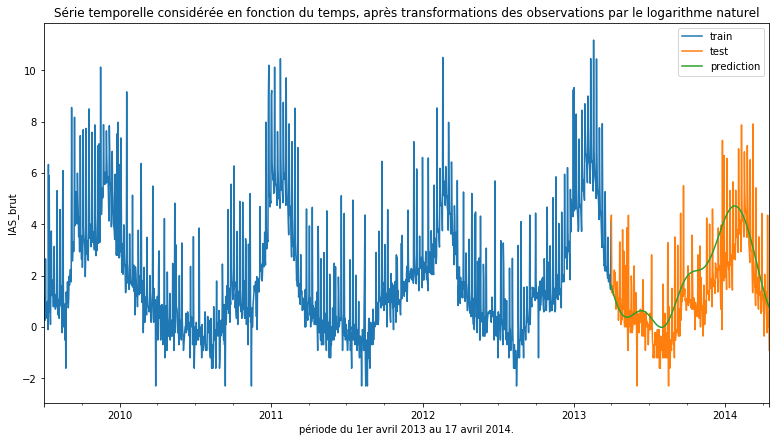

In [16]:
#Tracez les valeurs de la série temporelle et votre prédiction pour l’ensemble de données (vous pouvez utilisez les couleurs différentes pour les parties apprentissage et prédiction)

plt.figure(figsize = (13,7))
y_train.plot(label = "train")
y_test.plot(label = "test")
y_pred.plot(label = "prediction")
plt.title ("Série temporelle considérée en fonction du temps, après transformations des observations par le logarithme naturel")
plt.ylabel("IAS_brut")
plt.xlabel("période du 1er avril 2013 au 17 avril 2014.")
#plt.xlim(1369,1751)
plt.legend()
plt.show

In [17]:
#donnez le risque quadratique de la prédiction

risque_quadratique = mean_squared_error(y_test, y_pred)

print("risque quadratique de la prédiction : " + str(risque_quadratique))

risque quadratique de la prédiction : 1.9600580967945154


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

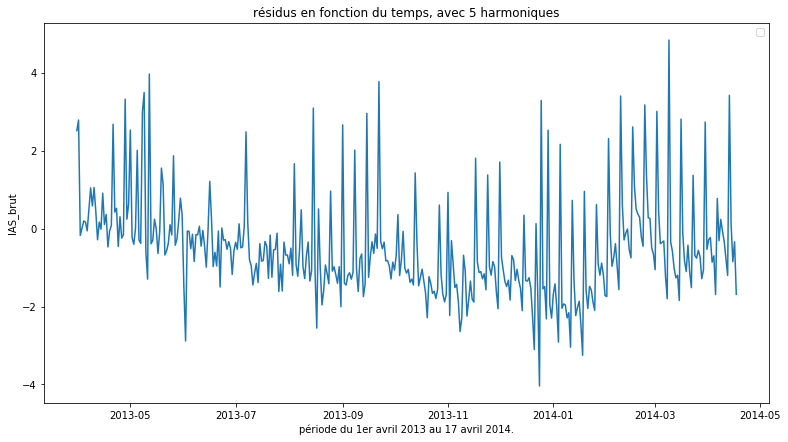

In [18]:
#tracez les résidus pour la période prédite

residus = y_test-y_pred

plt.figure(figsize = (13,7))
plt.plot(residus)
plt.title ("résidus en fonction du temps, avec 5 harmoniques")
plt.ylabel("IAS_brut")
plt.xlabel("période du 1er avril 2013 au 17 avril 2014.")
#plt.xlim(1369,1751)
plt.legend()
plt.show


In [19]:
#Essayez les valeur de n_harm pour voir comment varie le risque quadratique de la prédiction.

n_harm = 6
list_harmonique =  list(range(1,n_harm))

list_risk = []

for k in range(1, n_harm) :

    # on retire les variables non explicatives
    ST_log_bis =  ST_log.iloc[:,0:1+2*k] 
    
    ST_log_bis_train = ST_log_bis["2009-07-01":"2013-03-31"] 
    ST_log_bis_test = ST_log_bis["2013-03-31":]

    # Creation du jeu d'entraînement et de test

    y_train = ST_log_bis_train['IAS_brut']
    X_train = ST_log_bis_train.drop(['IAS_brut'], axis=1)

    y_test = ST_log_bis_test['IAS_brut']
    X_test = ST_log_bis_test.drop(['IAS_brut'], axis=1)

    reg = LinearRegression().fit(X=X_train, y=y_train)
    y_pred = reg.predict(X_test)
    
    risque_quadratique = mean_squared_error(y_test,y_pred)
    
    list_risk.append(risque_quadratique)
   

print(list_risk)


[2.1479984593281096, 2.0903428923766656, 1.9541335780993747, 1.9600580967945154, 1.9600580967945154]


<function matplotlib.pyplot.show(*args, **kw)>

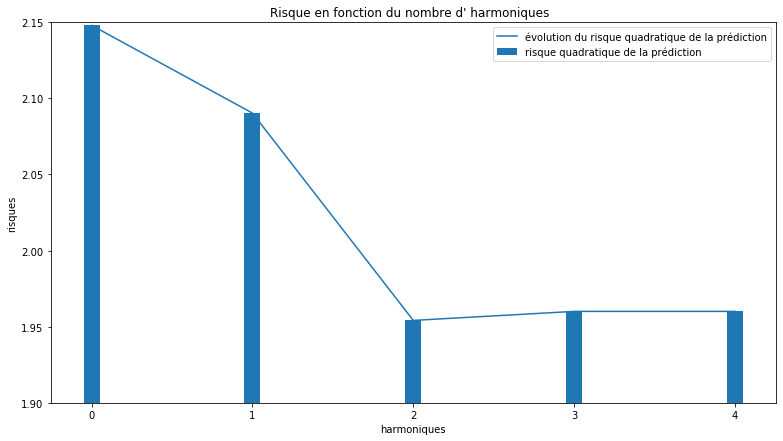

In [20]:
bar_index = list(range(0,len(list_risk)))

plt.figure(figsize = (13,7))
plt.bar(bar_index,list_risk, width = 0.1, label = "risque quadratique de la prédiction")
plt.plot(list_risk, label = "évolution du risque quadratique de la prédiction")
plt.title ("Risque en fonction du nombre d' harmoniques  ")
plt.ylabel("risques")
plt.xlabel("harmoniques")
plt.ylim(1.90,2.150)
plt.legend()
plt.show


## - Données "Trafic Internet" -

## Q8

Importez les données du fichier lbl-tcp-3.tcp. Chaque ligne du tableau correspond à un paquet et la première variable est le moment de sa transmission ; consultez  http://ita.ee.lbl.gov/html/contrib/LBL-TCP-3.html pour plus d’information sur les données. 

- Affichez 5 premières lignes du jeu de données.
- Tout d’abord, créez la série temporelle, où chaque observation correspond au nombre de paquets transmis dans un intervalle de 10 secondes. Il y a 720 intervalles, donc vous devez obtenir 720 observations.
- Tracez la série temporelle obtenue.



In [21]:
col_names = ["timestamp", "sourceHost", "destinationHost", "sourceTCPPort", "destinationTCPPort", "bytes"]

traficInternet = pd.read_csv("lbl-tcp-3.tcp", sep = ' ', na_values = 0, infer_datetime_format = True, names = col_names)

In [22]:
#Affichez 5 premières lignes du jeu de données.
traficInternet.head()

,timestamp,sourceHost,destinationHost,sourceTCPPort,destinationTCPPort,bytes
0,7.591038e+08,1,2,23,2436,1.0
1,1.044500e-02,2,1,2436,23,2.0
2,2.377500e-02,1,2,23,2436,2.0
3,2.655800e-02,2,1,2436,23,1.0
4,2.900200e-02,3,4,3930,119,42.0


In [23]:
traficInternet.loc[0,'timestamp'] = 0

In [24]:
traficInternet['time_second'] = traficInternet['timestamp']
traficInternet['time_second'] = to_datetime(traficInternet['time_second'],unit = 's')
traficInternet['time_second'] =  traficInternet['time_second'].apply( lambda x : x.replace(microsecond=0))

In [25]:
traficInternet = traficInternet.set_index('time_second')

#group by batch of 10 secs
ST_traficInternet_bytes = traficInternet.resample('10S', how={'bytes':'count'})  # useful

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  after removing the cwd from sys.path.


In [41]:
ST_traficInternet_bytes.head()

,bytes
index,
0,1162
1,1208
2,2333
3,1217
4,1293


In [27]:
ST_traficInternet_bytes['index']= list(range(len(ST_traficInternet_bytes.index)))
ST_traficInternet_bytes = ST_traficInternet_bytes.set_index('index')

<function matplotlib.pyplot.show(*args, **kw)>

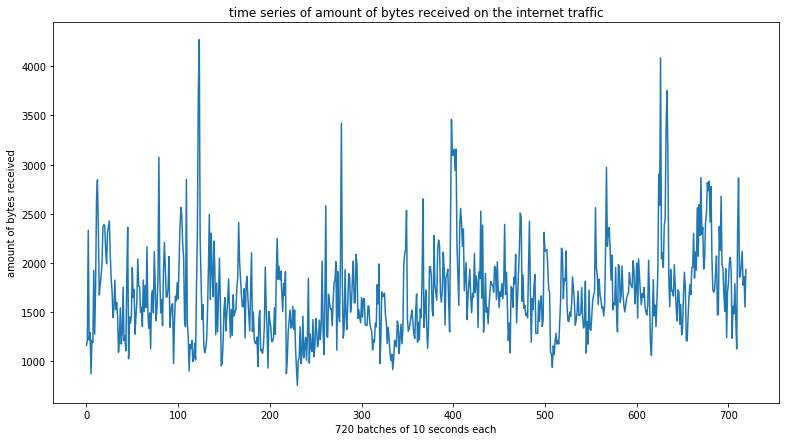

In [28]:
#Tracez la série temporelle obtenue.
#plot the timeseries
plt.figure(figsize=(13,7))
plt.plot(ST_traficInternet_bytes)
plt.title ("time series of amount of bytes received on the internet traffic")
plt.ylabel("amount of bytes received")
plt.xlabel("720 batches of 10 seconds each")
plt.show

## Q9
Dans cette question on vous propose de construire un modèle auto-régressif AR(p). L’apprentissage
du modèle ne demande pas beaucoup de temps et s’effectue avec 1 − 2 ligne de code à l’aide
de la fonction ARIMA() importée de statsmodels.tsa.arima_model. Le choix du paramètre p
(d’une gamme de valeur prédéfinies, disons de 1 à p max ) est moins simple. On va aborder trois
possibilité :  
- critère d’information d’Akaike (AIC),
- critère d’information bayésien (BIC) 
- et validation croisée/backtesting. 

Le critères d’information AIC et BIC sont normalement implémentés dans le logiciel et sont donnés
directement après l’apprentissage du modèle. 

Pour faire la validation croisée pour une série, on la coupe en n chunks chunks/folds et chaque foi utilise k premiers chunks pour entrainer le modèle et le chunk numéro k + 1 pour le tester (par exemple regarder le risque quadratique) ; voir le dessin ci-dessous.


Pour une gamme de valeur choisie, effectue les trois méthodes de la sélection du modèle.

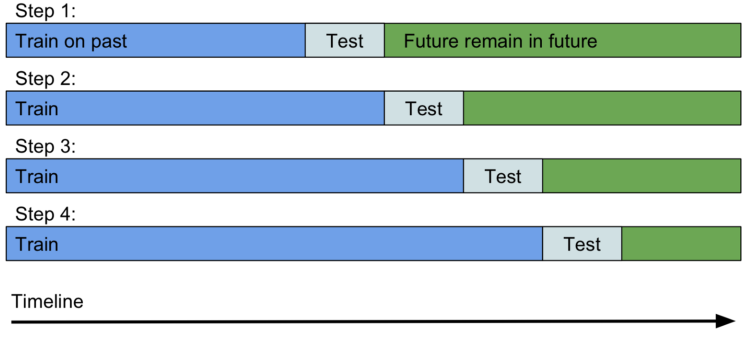

In [29]:
list_aic =  []
list_bic = []
list_mse_kfold=[]

#list_train=[]    uncomment if you want to plot train test and pred for each fold
#list_test=[]
#list_pred=[]

for i in range (1,8):
    model_arima = ARIMA(ST_traficInternet_bytes, order=(i,0,0)) 
    model_arima_fitted = model_arima.fit()
    
    arima_aic=model_arima_fitted.aic
    arima_bic=model_arima_fitted.bic
    
    list_aic.append(arima_aic)
    list_bic.append(arima_bic)

    
    list_mse = []
    num_fold = 10
    total = len(ST_traficInternet_bytes)
    len_fold = int(total/num_fold)

    for k in range(1,num_fold) :
        l = int(k*len_fold)
        #print("step no :" + str(k))
        #print("rows index for training from : " +  str(0) + " to " +  str(l-1))
        #print("rows index for test from : " +  str(l) + " to " +  str(l+len_fold-1))

        test_set = ST_traficInternet_bytes.loc[l:l+len_fold-1]
        training_set = ST_traficInternet_bytes.loc[:l-1]

        model_arima = ARIMA(ST_traficInternet_bytes, order=(i,0,0))
        model_arima_fitted = model_arima.fit(start=0, end=l-1)
        prediction = model_arima_fitted.predict(start=l, end=l+len_fold-1)


        mse = mean_squared_error(prediction, test_set)
        #print("Mean Squared error  = " + str(mse))
        list_mse.append(mse)
        #list_train.append(training_set)  uncomment if you want to plot train test and pred for each fold
        #list_test.append(test_set)
        #list_pred.append(prediction)

    mse_kfolds = np.mean(list_mse)
    list_mse_kfold.append(mse_kfolds)

<function matplotlib.pyplot.show(*args, **kw)>

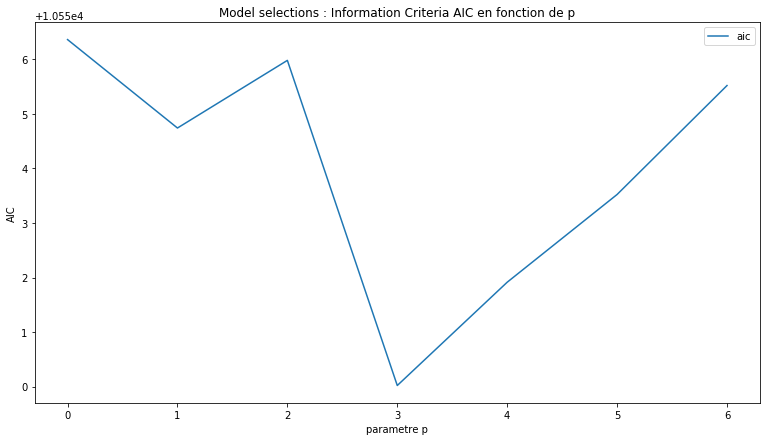

In [30]:
#aic and bic
plt.figure(figsize=(13,7))
plt.plot(list_aic,label = "aic")
plt.title ("Model selections : Information Criteria AIC en fonction de p")
plt.ylabel("AIC")
plt.xlabel("parametre p")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

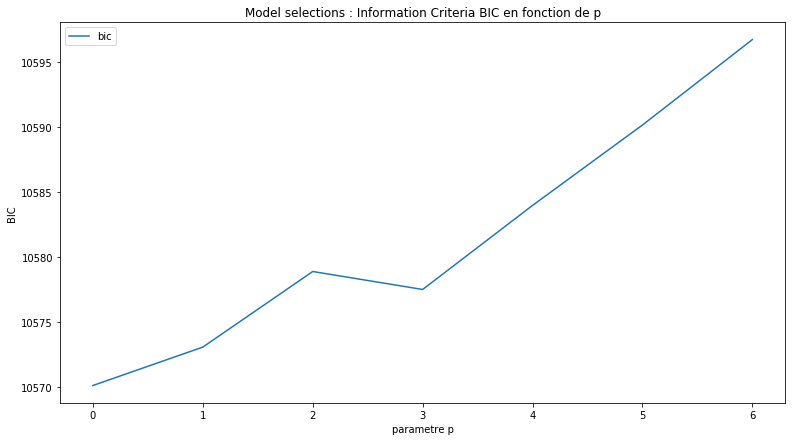

In [31]:
plt.figure(figsize=(13,7))
plt.plot(list_bic, label = "bic")
plt.title ("Model selections : Information Criteria BIC en fonction de p")
plt.ylabel("BIC")
plt.xlabel("parametre p")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

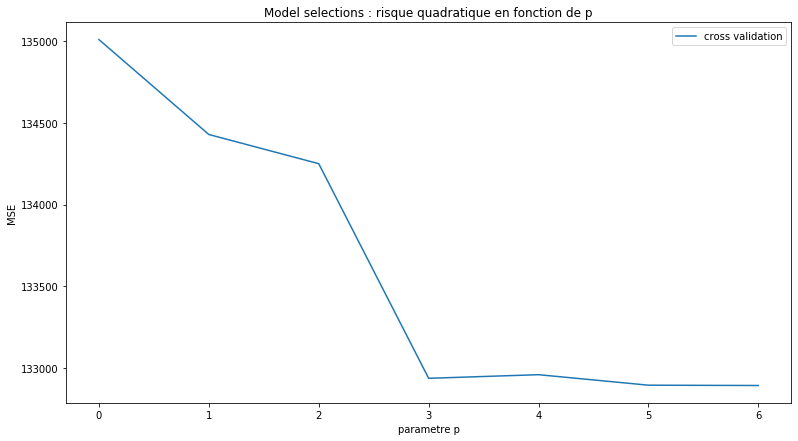

In [32]:
plt.figure(figsize=(13,7))
plt.plot(list_mse_kfold, label = "cross validation")
plt.title ("Model selections : risque quadratique en fonction de p")
plt.ylabel("MSE")
plt.xlabel("parametre p")
plt.legend()
plt.show

In [33]:
#séléction des valeurs optimales pour p
p_aic_selected = list_aic.index(min(list_aic))
p_bic_selected = list_bic.index(min(list_bic))
p_selected = list_mse_kfold.index(min(list_mse_kfold))

print("valeur de p optimale selon aic : " + str(p_aic_selected))
print("valeur de p optimale selon bic : " + str(p_bic_selected))
print("valeur de p optimale selon validation croisée : " + str(p_selected))

valeur de p optimale selon aic : 3
valeur de p optimale selon bic : 0
valeur de p optimale selon validation croisée : 6


**Commentaire** : au vu des différentes courbes, il y a une cassure notable à p = 3. C'est la valeur que nous choisirons.

## Q10
En ce basant sur les résultats de la question précédente, sélectionnez l’ordre p du modèle AR à
estimer et affichez les paramètres correspondants.
Tracez les résidus. Tracez l’estimation de la densité de résidus et la densité de la distribution
normale (avec moyenne et écart-type estimés) sur le même graphique et comparez les visuellement.
Commentez.

No handles with labels found to put in legend.


aic : 10555.98242297865
bic : 10578.8786790387


<function matplotlib.pyplot.show(*args, **kw)>

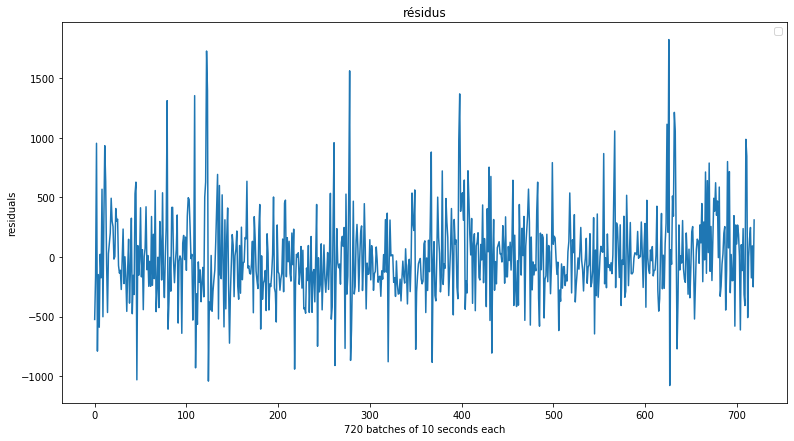

In [34]:
#sélectionnez l’ordre p du modèle AR à estimer et affichez les paramètres correspondants
model_arima = ARIMA(ST_traficInternet_bytes, order=(3,0,0)) 
model_arima_fitted = model_arima.fit()
print("aic : " + str(model_arima_fitted.aic))
print("bic : " + str(model_arima_fitted.bic))

#Tracez les résidus.
residuals = DataFrame(model_arima_fitted.resid)

plt.figure(figsize = (13,7))
plt.plot(residuals)
plt.title ("résidus")
plt.ylabel("residuals")
plt.xlabel("720 batches of 10 seconds each")
#plt.xlim(1369,1751)
plt.legend()
plt.show


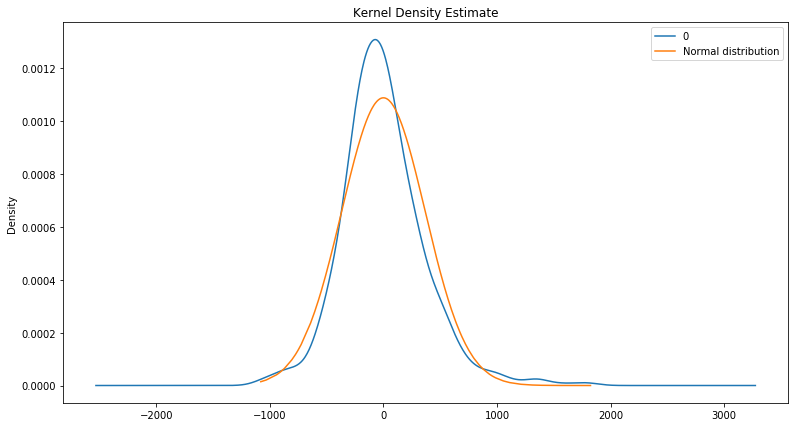

                 0
count   720.000000
mean      0.529879
std     367.073161
min   -1078.966183
25%    -219.691216
50%     -30.784700
75%     187.144019
max    1823.499078


In [35]:
#Tracez l’estimation de la densité de résidus et la densité de la distribution normale (avec moyenne et écart-type estimés) sur le même graphique et comparez les visuellement

residuals.plot(kind = "kde",figsize=(13,7), title = "Kernel Density Estimate", )
residual_sorted = residuals.sort_values(0)
mean_res = np.mean(residual_sorted)
std_res = np.std(residual_sorted)
fit = stats.norm.pdf(residual_sorted, mean_res, std_res)
plt.plot(residual_sorted,fit, label = "Normal distribution")
plt.legend()
plt.show()
print(residuals.describe())

**commentaire** : Par rapport à une distribution normale, le modèle AR peut avoir des valeurs extrêmes plus importantes. 

# - Données “Southern oscillation index” -

## Q11
Importez les données du fichier soi.tsv. Consultez http://www.bom.gov.au/climate/glossary/
soi.shtml pour plus d’information sur les données. Supprimez les données manquantes.

In [36]:
col_name = ['test']
ST_soi_brut= pd.read_csv("soi.tsv", delimiter="\t", header=None )
ST_soi = np.transpose(ST_soi_brut)


In [37]:
## for some reason, leaving the default column name '0' is problematic for plotting autocorrelation and partial autocorrelation function.
##  ST_soi colname = ST_soi.columns[0] returns 0 but  using ST_soi.rename(columns={"0": "Test"}) didn't yield any expected result
## adding column name directly in read_csv with parameters names = ['value'] doesn't work either since it's originally a row
## therefore I used the solution below, although not really elegant

ST_soi['Test']= ST_soi
ST_soi = ST_soi['Test']
ST_soi = ST_soi.dropna()                   

## Q12
A l’aide des fonctions plot_acf() et plot_pacf() importées de statsmodels.graphics.tsaplots,
tracez la fonction d’autocorrélation et la fonction d’autocorrélation partielle.

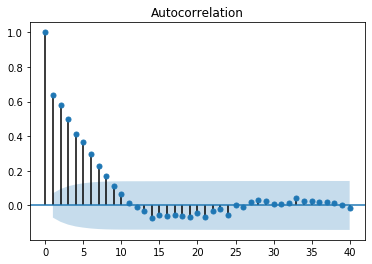

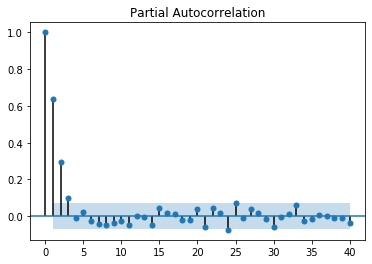

In [38]:
plot_acf(ST_soi, lags=40);
plot_pacf(ST_soi, lags = 40);

**Commentaire** : L'autocorrélation partielle du processus étudié est notable jusqu'à un lag=3, c'est la valeur que nous allons choisir.

## Q13

En ce basant sur la question précédente, choisissez l’ordre du processus auto-régressive AR(p).
Entraîner le modèle AR choisi. Tracez les résidus. Tracez l’estimation de la densité de résidus et la
densité de la distribution normale (avec moyenne et écart-type estimés) sur le même graphique et
comparez les visuellement. Commentez.

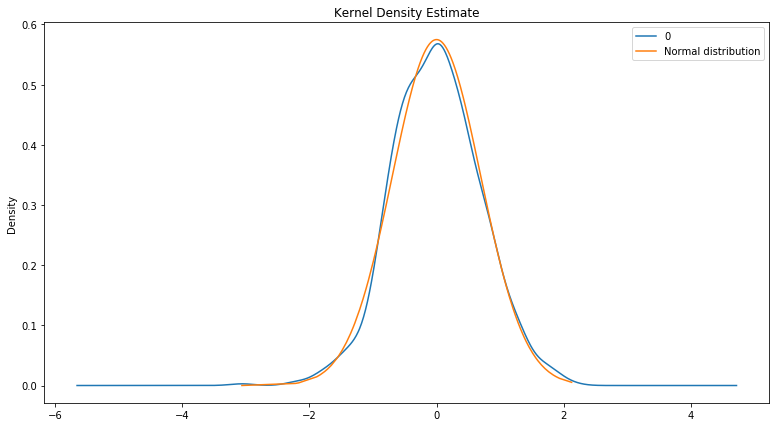

In [39]:
#autocorrelation partielle significative jusque ordre 11

arma_model = ARMA(ST_soi, order=(3,0,0))
arma_model_fitted = arma_model.fit()
residuals_arma = DataFrame(arma_model_fitted.resid)

residuals_arma.plot(kind = "kde",figsize=(13,7), title = "Kernel Density Estimate" )
residual_arma_sorted = residuals_arma.sort_values(0)
mean_res = np.mean(residual_arma_sorted)
std_res = np.std(residual_arma_sorted)
fit = stats.norm.pdf(residual_arma_sorted, mean_res, std_res)
plt.plot(residual_arma_sorted,fit, label = "Normal distribution")
plt.legend()
plt.show()

**Commentaire** : ici la courbe des résidus semble mieux se juxtaposer à la distribution normale.

## Q14
Tracez le périodogramme ; superposez le à la densité spectrale du modèle estimé à la question
précédente. On utilisera qu’un modèle AR(p) de coefficients auto-régressifs $\phi_1 , . . . , \phi_p$ satisfaisant
l’équation AR

$$X_t= \sum_{k=1}^p \phi_kX_{t-k} +\epsilon_t$$

avec ($\epsilon_t$) bruit blanc de variance $\sigma^2$ , a pour densité spectrale

$$f(\lambda) = \frac{\sigma^2}{2\pi} |1-\sum_{k=1}^{p}\phi_k e^{-ik\lambda}|^{-2} $$ 

(pour des fréquences absolues normalisées entre $-\pi$ et $\pi$) ou


$$ f(\omega)= \sigma^2 |1-\sum_{k=1}^{p}\phi_k e^{-2i\pi k \omega}|^{-2} $$
(pour des fréquences absolues normalisées entre −1/2 et 1/2, convention usuelle en traitement du
signal.)

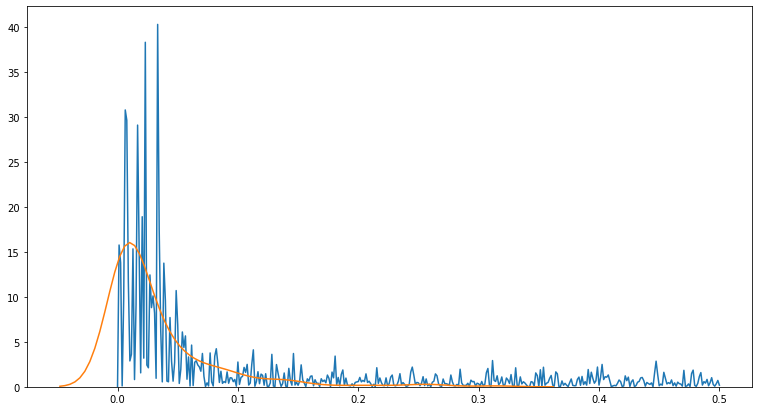

In [40]:
from scipy.stats import gaussian_kde

f_soi, Pxx_soi = signal.periodogram(ST_soi)
plt.figure(figsize = (13,7))
f_ar, Pxx_ar = signal.periodogram(ArmaProcess(arma_model_fitted.arparams).generate_sample(nsample = 500), scaling = "spectrum")
plt.plot(f_soi, Pxx_soi)
sns.kdeplot(Pxx_ar)
plt.show()

**Commentaire** : en comparant les deux courbes, le modèle AR(p) avec p = 3 semble plutôt bien approximer la densité spectrale du signal